<h2>Calcolo della massima portata in un nodo</h2>
(E' necessario aver svolto le simulazioni per tutti i tempi di pioggia)

Si carica la libreria che consente di conoscere e scegliere la directory di lavoro

In [1]:
import os
os.getcwd()

'C:\\Users\\anzo5\\Desktop\\fognatura\\nodes'

Si interroga ora la lista dei file presenti nella nuova directory di lavoro. Se corretta sono presenti le cartelle relative alle simulazioni per ogni tempo di pioggia. (5mins, 10mins,...)

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'csv',
 'desktop.ini',
 'n01_qmax.ipynb',
 'n02_qmax.ipynb',
 'n03_qmax.ipynb',
 'n04_qmax.ipynb',
 'n05_qmax.ipynb',
 'n06_qmax.ipynb',
 'n07_qmax.ipynb',
 'n08_qmax.ipynb',
 'n10_qmax.ipynb',
 'n11_qmax.ipynb',
 'n12_qmax.ipynb',
 'n13_qmax.ipynb',
 'n14_qmax.ipynb',
 'n15_qmax.ipynb',
 'n16_qmax.ipynb',
 'n17_qmax.ipynb',
 'n18_qmax.ipynb',
 'n19_qmax.ipynb',
 'n20_qmax.ipynb',
 'n21_qmax.ipynb',
 'n22_qmax.ipynb',
 'n23_qmax.ipynb',
 'n24_qmax.ipynb',
 'n25_qmax.ipynb',
 'n26_qmax.ipynb',
 'n29_qmax.ipynb']

In [3]:
os.chdir('csv')
os.listdir()

['.~lock.n25.csv#',
 'n00.csv',
 'n01.csv',
 'n02.csv',
 'n03.csv',
 'n04.csv',
 'n05.csv',
 'n06.csv',
 'n07.csv',
 'n08.csv',
 'n09.csv',
 'n10.csv',
 'n11.csv',
 'n12.csv',
 'n13.csv',
 'n14.csv',
 'n15.csv',
 'n16.csv',
 'n17.csv',
 'n18.csv',
 'n19.csv',
 'n20.csv',
 'n21.csv',
 'n22.csv',
 'n23.csv',
 'n24.csv',
 'n25.csv',
 'n26.csv',
 'n27.csv',
 'n28.csv',
 'n29.csv']

Finalmente si importa la libreria "pandas"

In [4]:
from pandas import *
import pandas as pd
import datetime as datetime


Si legge il file csv del nodo contenente le portate nel tempo per i diversi tempi di pioggia, usando il comando di panda <code>read_csv</code>

In [5]:
pd.options.display.max_rows = 20
node = pd.read_csv('n08.csv')
map(datetime, node['time'])
node = node.set_index('time')
node

,5min,10min,15min,20min,25min
time,,,,,
00:00:30,0.005302,0.002323,0.001407,0.000974,0.000726
00:01:00,0.012373,0.005271,0.003161,0.002178,0.001619
00:01:30,0.027174,0.011573,0.007005,0.004901,0.003700
00:02:00,0.050844,0.020827,0.012419,0.008580,0.006442
00:02:30,0.090185,0.034897,0.020366,0.013951,0.010423
00:03:00,0.157889,0.057625,0.032439,0.021810,0.016049
00:03:30,0.263396,0.093149,0.050721,0.033180,0.024074
00:04:00,0.416462,0.147118,0.078860,0.050627,0.036086
00:04:30,0.614067,0.221978,0.118775,0.075688,0.053291


Finalmente visualizziamo i dati con matplotlib. Il secondo comando, preceduto da "%" consente di visualizzare automaticamente sullo schermo il risultato grafico. 

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 

Si visualizzano le curve di portata rispetto all'andamento nel tempo per un controllo ulteriore

In [7]:
all=node[['5min','10min', '15min', '20min', '25min']]

[]

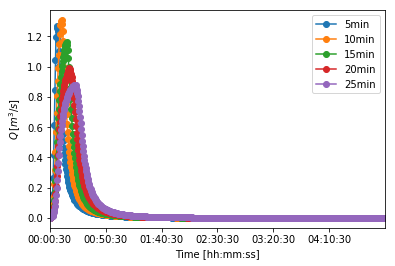

In [8]:
ax = all.plot(style="-o")
ax.set_xlabel('Time [hh:mm:ss]')
ax.set_ylabel(r'$Q\,\left[m^3/s\right]$')
ax.plot()

Si valuta il valore massimo di portata tra i massimi ottenuti per tempi diversi di pioggia e il relativo tempo critico

In [9]:
n_t1 = node['5min']
n_t2 = node['10min']
n_t3 = node['15min']
n_t4 = node['20min']
n_t5 = node['25min']

In [10]:
maxValues = [n_t1.max(), n_t2.max(), n_t3.max(), n_t4.max(), n_t5.max()]
maxValues

[1.266618, 1.307339, 1.161434, 0.988426, 0.8816440000000001]

Il valore massimo tra i tempi è $Q_{max}$ e vale

In [11]:
maxValue = max(maxValues)
maxValue

1.307339

cioè, in litri

In [12]:
maxValue * 1000

1307.339

La sua posizione nel file dei massimi è:

In [13]:
maxValues.index(maxValue)

1

cioè è causata dalla precipitazione di **10min**.

Ora ci proponiamo di trovare il tempo in cui il massimo si realizza. Per fare questo dobbiamo considerare il primo dataFrame.

In [14]:
mask=(n_t2==n_t2.max())

In [15]:
n_t2[mask]

time
00:11:00    1.307339
Name: 10min, dtype: float64

Il tempo di pioggia critico risulta:

In [16]:
n_t2[mask].index

Index(['00:11:00'], dtype='object', name='time')

---